Look at coverage of a few specific classes for each method

In [2]:
# import glob # For getting file names
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
# import seaborn as sns
# # import torch

from utils.experiment_utils import *

%load_ext autoreload
%autoreload 2

Mapping from ImageNet labels to names: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [20]:
dataset = 'imagenet'
pth = f'/home/tding/code/class-conditional-conformal/.cache/paper/varying_n/{dataset}/random_calset/n_totalcal=20/score=softmax/seed=0_allresults.pkl'

In [21]:
with open(pth, 'rb') as f:
    results = pickle.load(f)

Number of seeds found: 10


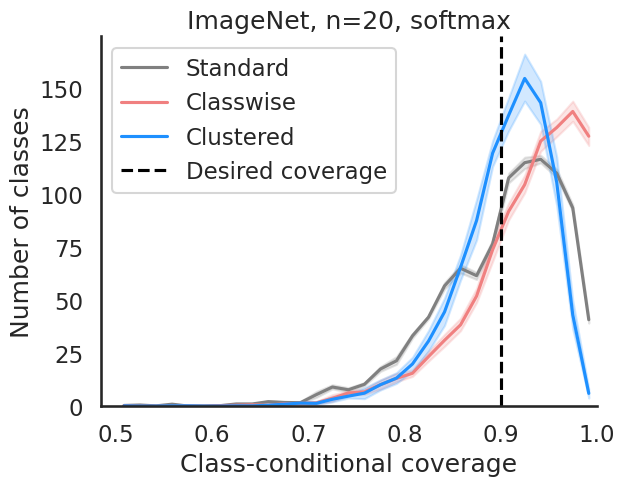

In [34]:
n_totalcal = 20
score = 'softmax'
folder = f'/home/tding/code/class-conditional-conformal/.cache/paper/varying_n/{dataset}/random_calset/n_totalcal={n_totalcal}/score={score}'
plot_class_coverage_histogram(folder, desired_cov=0.9, vmin=.5, vmax=1, nbins=30, 
                              methods = ['standard', 'classwise', 'cluster_random'],
                              title=f'ImageNet, n={n_totalcal}, {score}')

Number of seeds found: 10


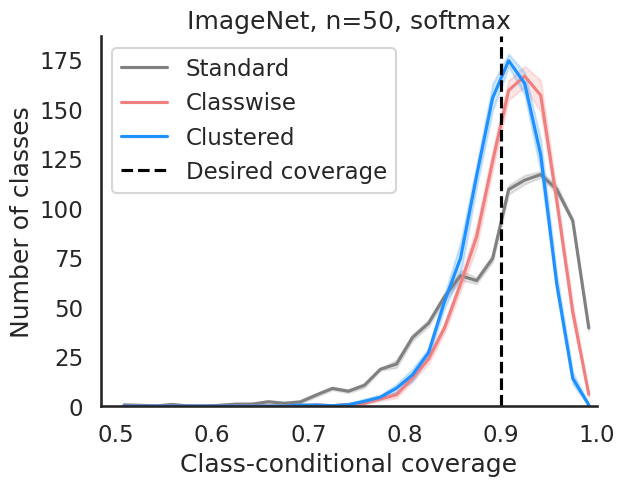

In [39]:
n_totalcal = 50
score = 'softmax'
folder = f'/home/tding/code/class-conditional-conformal/.cache/paper/varying_n/{dataset}/random_calset/n_totalcal={n_totalcal}/score={score}'
plot_class_coverage_histogram(folder, desired_cov=0.9, vmin=.5, vmax=1, nbins=30, 
                              methods = ['standard', 'classwise', 'cluster_random'],
                              title=f'ImageNet, n={n_totalcal}, {score}')

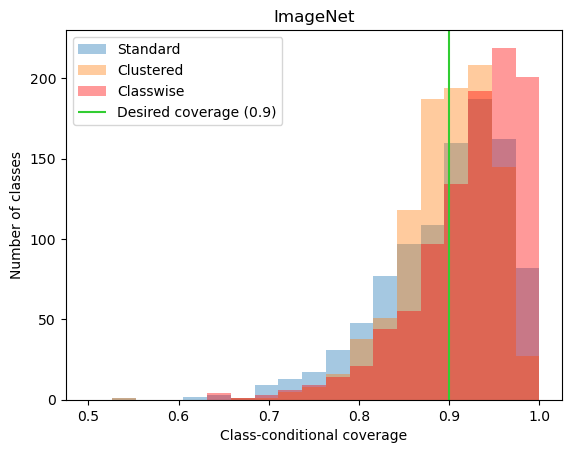

In [23]:
# Combined hist
alpha = 0.4 # For opacity

bins = np.linspace(0.5, 1, 20)
plt.hist(results['standard'][2]['raw_class_coverages'], bins=bins, alpha=alpha, label='Standard')
plt.hist(results['cluster_random'][2]['raw_class_coverages'], bins=bins, alpha=alpha, label='Clustered')
plt.hist(results['classwise'][2]['raw_class_coverages'], bins=bins, alpha=alpha, label='Classwise', color='red')

plt.xlabel('Class-conditional coverage')
plt.ylabel('Number of classes')

ymin, ymax = plt.ylim()
plt.vlines(x=0.9, ymin=ymin, ymax=ymax, label='Desired coverage (0.9)', color='limegreen')
plt.ylim(ymin, ymax)

plt.title('ImageNet')
plt.legend(loc='upper left')
plt.show()

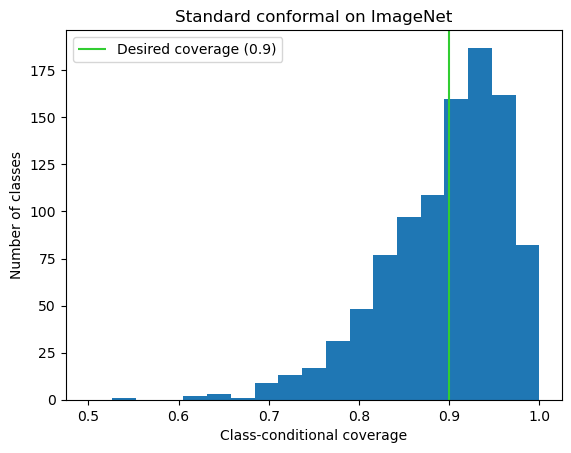

In [24]:
bins = np.linspace(0.5, 1, 20)
plt.hist(results['standard'][2]['raw_class_coverages'], bins=bins)
plt.xlabel('Class-conditional coverage')
plt.ylabel('Number of classes')

ymin, ymax = plt.ylim()
plt.vlines(x=0.9, ymin=ymin, ymax=ymax, label='Desired coverage (0.9)', color='limegreen')
plt.ylim(ymin, ymax)

plt.title('Standard conformal on ImageNet')
plt.legend(loc='upper left')
plt.show()

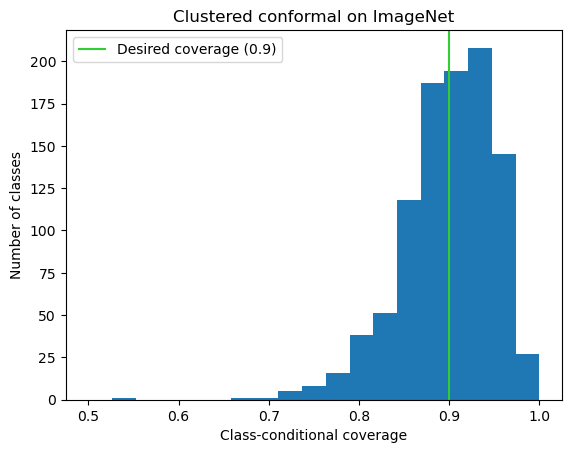

In [25]:
plt.hist(results['cluster_random'][2]['raw_class_coverages'], bins=bins)
plt.xlabel('Class-conditional coverage')
plt.ylabel('Number of classes')

ymin, ymax = plt.ylim()
plt.vlines(x=0.9, ymin=ymin, ymax=ymax, label='Desired coverage (0.9)', color='limegreen')
plt.ylim(ymin, ymax)

plt.title('Clustered conformal on ImageNet')
plt.legend(loc='upper left')
plt.show()

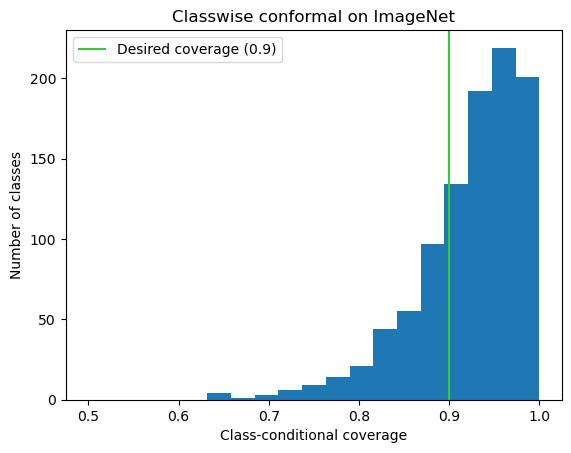

In [26]:
plt.hist(results['classwise'][2]['raw_class_coverages'], bins=bins)
plt.xlabel('Class-conditional coverage')
plt.ylabel('Number of classes')

ymin, ymax = plt.ylim()
plt.vlines(x=0.9, ymin=ymin, ymax=ymax, label='Desired coverage (0.9)', color='limegreen')
plt.ylim(ymin, ymax)

plt.title('Classwise conformal on ImageNet')
plt.legend(loc='upper left')
plt.show()

In [143]:
print(results['standard'][2]['raw_class_coverages'])

[0.95912807 0.98146514 0.94329433 0.90812721 0.92609083 0.88701068
 0.94921191 0.96170971 0.92224231 0.98669033 0.96663661 0.98649865
 0.98575245 0.98388541 0.98653501 0.97484277 0.99202128 0.97737557
 0.95682819 0.99096658 0.9524237  0.96102746 0.98644986 0.96409336
 0.98839286 0.9516129  0.87978629 0.92807018 0.94755245 0.96241259
 0.96696429 0.96058662 0.9137148  0.90627763 0.89177102 0.89097408
 0.8573975  0.95729537 0.92682927 0.94029851 0.95784753 0.91436218
 0.94794521 0.91880781 0.92793594 0.96731449 0.8409294  0.96932515
 0.98573975 0.93799823 0.95446266 0.98901099 0.83451327 0.92685103
 0.82373782 0.86343217 0.95814782 0.96352313 0.90778872 0.91931097
 0.75067996 0.93515982 0.84434968 0.95217006 0.92876465 0.9061116
 0.78890877 0.8863026  0.85106383 0.96825397 0.96349065 0.96814159
 0.98214286 0.78253119 0.79155673 0.97163121 0.96129613 0.9453405
 0.94348222 0.95514512 0.91197822 0.97053571 0.92057762 0.92912705
 0.97860963 0.9549955  0.7677305  0.98770852 0.98133333 0.979335

In [141]:
print('==== Most undercovered class under standard ====')
most_undercov = results['standard'][2]['raw_class_coverages'].argmin()
print('Class:', most_undercov)
print('Coverage under standard :', results['standard'][2]['raw_class_coverages'][most_undercov])
print('Coverage under clustered:', results['cluster_proportional'][2]['raw_class_coverages'][most_undercov])
print('Coverage under classwise:', results['classwise'][2]['raw_class_coverages'][most_undercov])

==== Most undercovered class under standard ====
Class: 899
Coverage under standard : 0.5084594835262689
Coverage under clustered: 0.786286731967943
Coverage under classwise: 0.9029385574354408


In [142]:
 results['standard'][2]['marginal_cov']

0.8975070055690988

In [127]:
print('==== Most overcovered class under standard ====')
most_overcov = results['standard'][2]['raw_class_coverages'].argmax()
print('Class:', most_overcov)
print('Coverage under standard :', results['standard'][2]['raw_class_coverages'][most_overcov])
print('Coverage under clustered:', results['cluster_proportional'][2]['raw_class_coverages'][most_overcov])
print('Coverage under classwise:', results['classwise'][2]['raw_class_coverages'][most_overcov])

==== Most undercovered class under standard ====
Class: 339
Coverage under standard : 0.9965277777777778
Coverage under clustered: 0.96875
Coverage under classwise: 0.9166666666666666


Class 339 corresponds to "sorrel," which is not a very common thing. Let's find another overcovered class that is more familiar

In [144]:
np.where(results['standard'][2]['raw_class_coverages'] > .99)

(array([ 16,  19, 102, 105, 130, 289, 321, 323, 339, 340, 387, 388]),)

102 = koala
105 = flamingo
289 = leopard

In [158]:
cls = 105
results['standard'][2]['raw_class_coverages'][cls]

0.991899189918992

In [128]:
# # For comparison
# print('==== Most undercovered class under clustered ====')
# method = 'cluster_proportional'
# most_undercov = results[method][2]['raw_class_coverages'].argmin()
# print('Class:', most_undercov)
# print('Coverage:', results[method][2]['raw_class_coverages'][most_undercov])

## Examining the prediction sets

I want to say something about how the overcovered classes are included in too many classes. In order to do this, I need to save the prediction sets

In [174]:
dataset = 'imagenet'
save_folder = '.cache/paper/case_study'
alpha = 0.1
n_totalcal = 50
score_function_list = ['softmax']
# methods = ['standard', 'classwise', 'cluster_proportional']
methods = ['standard']
seeds = [0]
run_one_experiment(dataset, save_folder, alpha, n_totalcal, score_function_list, methods, seeds, 
                       save_preds=True, save_labels=True, calibration_sampling='random')

softmax_scores shape: (1153051, 1000)
====== score_function=softmax ======
Computing conformal score...

seed=0
Loaded existing results file containing results for ['standard', 'classwise', 'cluster_proportional']
Class counts range from 24 to 73
dataset=imagenet, n=50,score_function=softmax, seed=0, method=standard
CLASS COVERAGE GAP: 0.053244128002303735
AVERAGE SET SIZE: 1.8811514608118753
Saved labels to .cache/paper/case_study/imagenet/random_calset/n_totalcal=50/score=softmax/seed=0_labels.npy
Saved results to .cache/paper/case_study/imagenet/random_calset/n_totalcal=50/score=softmax/seed=0_allresults.pkl


In [150]:
pth = '.cache/paper/case_study/imagenet/random_calset/n_totalcal=50/score=softmax/seed=0_allresults.pkl'
with open(pth, 'rb') as f:
    results = pickle.load(f)


In [175]:
labels_pth = '.cache/paper/case_study/imagenet/random_calset/n_totalcal=50/score=softmax/seed=0_labels.npy'
labels = np.load(labels_pth)

In [159]:
standard_preds = results['standard'][1]

In [168]:
# Count number of times cls 105 is predicted
cls = 105
ct = np.sum([1 if np.isin(cls, pred) else 0 for pred in standard_preds])

In [178]:
ct

1198

In [169]:
# Total number of predictions
len(standard_preds)

1103051

In [177]:
np.sum(labels == cls)

1111

Okay, actually, the overcovered case is not so bad. Flamingo is the true label for 1111 examples, and the prediction sets include flaminogo 1198 times. 